In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
train = pd.read_csv("Train_v2.csv")
test = pd.read_csv("Test_v2.csv")
sub = pd.read_csv("SubmissionFile.csv")
variables = pd.read_csv("VariableDefinitions.csv")

In [3]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
sub.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1
1,uniqueid_6722 x Kenya,0
2,uniqueid_6714 x Kenya,1
3,uniqueid_8103 x Kenya,1
4,uniqueid_8657 x Kenya,1


In [6]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [7]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

### Bar Chart for Categorical Features


In [9]:
def bar_chart(feature):
    account = train[train['bank_account']=='Yes'][feature].value_counts()
    no_account = train[train['bank_account']=='No'][feature].value_counts()
    df = pd.DataFrame([account,no_account])
    df.index = ['account','no_acccount']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

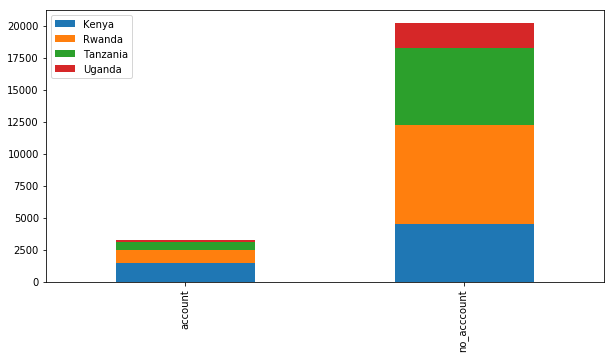

In [10]:
bar_chart('country')

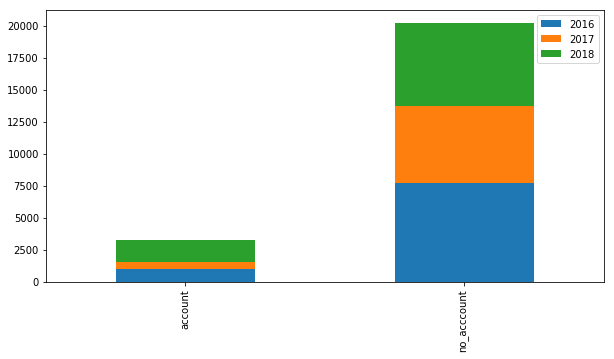

In [11]:
bar_chart('year')

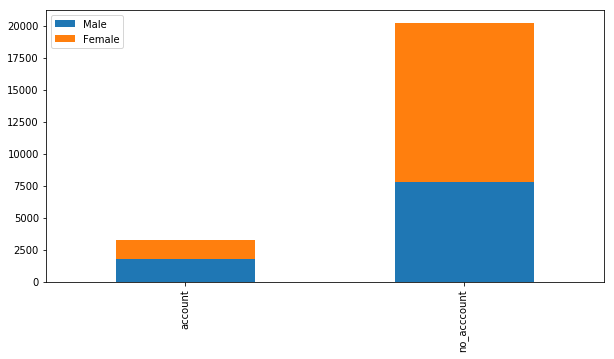

In [12]:
bar_chart('gender_of_respondent')

In [13]:
train['age_of_respondent'].value_counts()

30     1056
35      836
25      792
28      748
32      715
40      685
20      626
26      615
23      588
18      585
27      570
22      568
45      564
24      562
38      554
33      527
34      522
29      517
17      477
21      471
19      470
31      467
16      462
36      460
42      450
50      448
37      434
39      374
43      371
60      364
       ... 
66      120
72       97
71       95
73       92
69       87
78       83
76       72
74       64
79       58
77       56
85       55
82       41
83       33
90       28
86       25
81       24
88       24
84       20
95       19
89       16
87       16
92        7
98        6
100       5
94        5
91        5
93        4
96        3
99        2
97        1
Name: age_of_respondent, Length: 85, dtype: int64

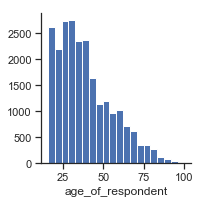

In [14]:
# Set plot style
sns.set(style='ticks', color_codes=True)

# Plot passenger age distribution
age_hist = sns.FacetGrid(train)
age_hist.map(plt.hist, 'age_of_respondent', bins=20)

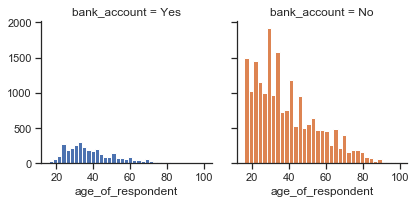

In [15]:
# Plot histogram of survival by age
age_hist = sns.FacetGrid(train, col='bank_account', hue='bank_account')
age_hist.map(plt.hist, 'age_of_respondent', bins=35)

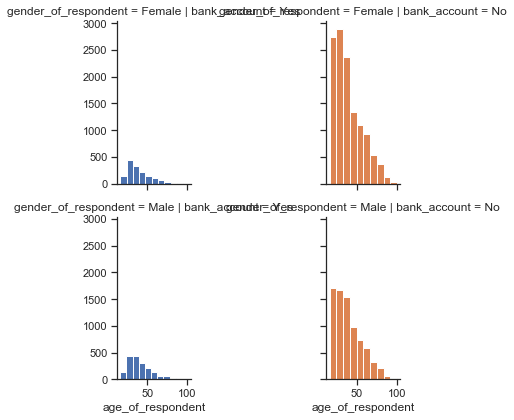

In [16]:
# Plot histogram by survival, sex, and age
age_sex_hist = sns.FacetGrid(train, col='bank_account', row='gender_of_respondent', hue='bank_account')
age_sex_hist.map(plt.hist, 'age_of_respondent', bins=10)

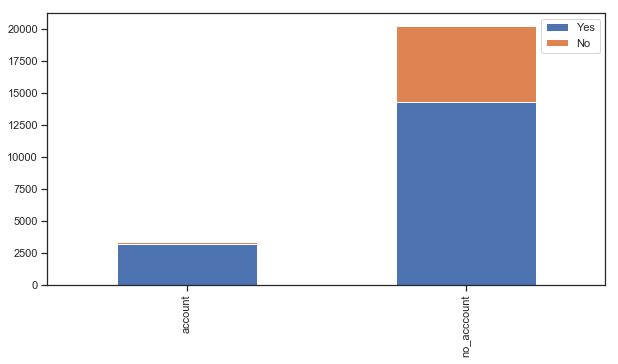

In [18]:
bar_chart('cellphone_access')

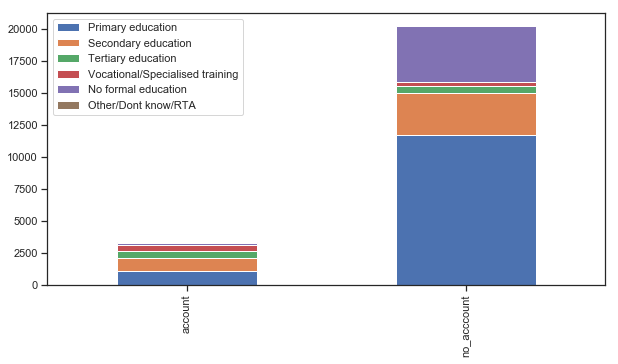

In [19]:
bar_chart('education_level') 

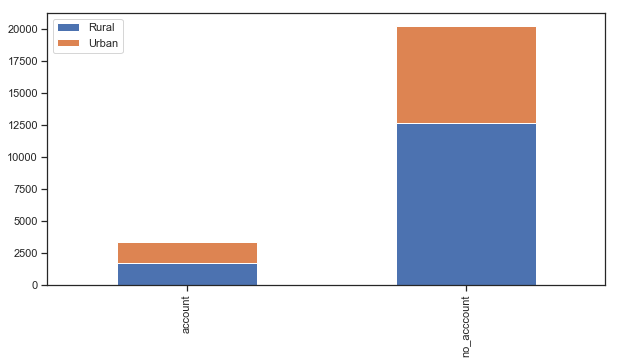

In [20]:
bar_chart('location_type')

### Data Preprocessing

### Building unique_Id with the new form :  uniqueid + " x " + country name


In [21]:
train["uniqueid"]= train["uniqueid"]+ " x " + train["country"]
test["uniqueid"]= test["uniqueid"]+ " x " + test["country"]

### Make categorical features binary

In [22]:
d={'Male':0,'Female':1}
train["gender_of_respondent"]=train["gender_of_respondent"].apply(lambda x:d[x])
test["gender_of_respondent"]=test["gender_of_respondent"].apply(lambda x:d[x])


In [23]:
d={'No':0,'Yes':1}
train["bank_account"]=train["bank_account"].apply(lambda x:d[x])

In [24]:
d={'No':0,'Yes':1}
train["cellphone_access"]=train["cellphone_access"].apply(lambda x:d[x])
test["cellphone_access"]=test["cellphone_access"].apply(lambda x:d[x])

In [25]:
train["location_type"].unique()

array(['Rural', 'Urban'], dtype=object)

In [26]:
d={'Rural':0,'Urban':1}
train["location_type"]=train["location_type"].apply(lambda x:d[x])
test["location_type"]=test["location_type"].apply(lambda x:d[x])

In [27]:
train["relationship_with_head"].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [28]:
d = {'Spouse':0, 'Head of Household':1, 'Other relative':2, 'Child':3, 'Parent':4,'Other non-relatives':5}
train["relationship_with_head"]=train["relationship_with_head"].apply(lambda x:d[x])
test["relationship_with_head"]=test["relationship_with_head"].apply(lambda x:d[x])

In [29]:
train["marital_status"].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [30]:
d= {'Married/Living together' :0, 'Single/Never Married':1, 'Divorced/Seperated':2, 'Widowed':3, 'Dont know':4}
train["marital_status"]=train["marital_status"].apply(lambda x:d[x])
test["marital_status"]=test["marital_status"].apply(lambda x:d[x])

In [31]:
train["education_level"].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [32]:
d={'Secondary education':0, 'No formal education':1,'Vocational/Specialised training': 2, 'Primary education':3,
       'Tertiary education':4, 'Other/Dont know/RTA':5, '6':6}
train["education_level"]=train["education_level"].apply(lambda x:d[x])
test["education_level"]=test["education_level"].apply(lambda x:d[x])

In [33]:
train["job_type"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [34]:
d={'Self employed':0, 'Government Dependent':1,
       'Formally employed Private':2, 'Informally employed':3,
       'Formally employed Government':4, 'Farming and Fishing':5,
       'Remittance Dependent':6, 'Other Income':7,
       'Dont Know/Refuse to answer':8, 'No Income':9}
train["job_type"]=train["job_type"].apply(lambda x:d[x])
test["job_type"]=test["job_type"].apply(lambda x:d[x])

In [35]:

train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [36]:
d={'Kenya':0, 'Rwanda':1, 'Tanzania':2, 'Uganda':3}
train["country"]=train["country"].apply(lambda x:d[x])
test["country"]=test["country"].apply(lambda x:d[x])

In [37]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1 x Kenya,1,0,1,3,24,1,0,0,0,0
1,0,2018,uniqueid_2 x Kenya,0,0,0,5,70,1,1,3,1,1
2,0,2018,uniqueid_3 x Kenya,1,1,1,5,26,0,2,1,2,0
3,0,2018,uniqueid_4 x Kenya,0,0,1,5,34,1,1,0,3,2
4,0,2018,uniqueid_5 x Kenya,0,1,0,8,26,0,3,1,3,3


In [38]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_6056 x Kenya,1,1,3,30,0,1,0,0,4
1,0,2018,uniqueid_6060 x Kenya,1,1,7,51,0,1,0,2,2
2,0,2018,uniqueid_6065 x Kenya,0,0,3,77,1,4,0,1,6
3,0,2018,uniqueid_6072 x Kenya,0,0,6,39,1,1,0,3,6
4,0,2018,uniqueid_6073 x Kenya,1,0,3,16,0,3,1,0,6


In [39]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [40]:
#without   'household_size','age_of_respondent', 'marital_status', 'year', 'relationship_with_head',
columns_train=[   'location_type','country', 'marital_status', 
       'cellphone_access',  
       'gender_of_respondent', 
       'education_level', 'job_type']
columns_target=['bank_account']

X=train[columns_train]

Y=train[columns_target]

In [41]:
x_test = test[columns_train]

In [ ]:
bar_chart('age_of_respondent')

In [42]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [43]:
#predicting with xgboost
model = XGBClassifier(n_estimators=1500,learning_rate =0.25)
model.fit(X, Y)

C:\Users\Aymen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aymen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.25, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [44]:
print(model.feature_importances_)


[0.09587952 0.18259378 0.0359231  0.3451323  0.08077589 0.15689522
 0.10280015]


In [45]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
cellphone_access,0.345
country,0.183
education_level,0.157
job_type,0.103
location_type,0.096
gender_of_respondent,0.081
marital_status,0.036


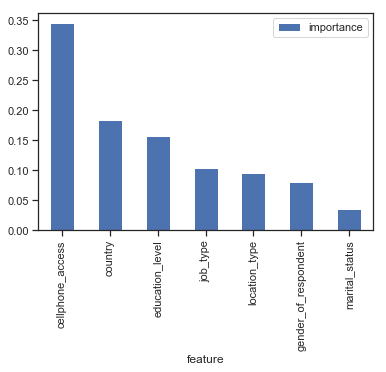

In [46]:
importances.plot.bar()


In [47]:
model.score(X, Y)


0.891515048461146

In [48]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [49]:
submission= pd.DataFrame({'uniqueid':test["uniqueid"],'bank_account':y_pred})
submission.to_csv("submission.csv",index=False)

In [50]:
submission=pd.read_csv("submission.csv")
submission.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
